# Count violations

Show the violations of a spec. Use this to investigate the features we use for learning of a visualization.

In [1]:
from draco.spec import Data, Task, Query
from draco.learn.helper import count_violations, compute_cost, compute_violation_costs
import pandas as pd
from vega3 import VegaLite
from pprint import pprint

import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.WARN)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/Library/F

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/Library/F

In [2]:
true = True
false = False

In [8]:
data_url = '../data/cars.json'
data = Data.from_json(data_url)

spec1 = {
  "mark": "bar",
  "encoding": {
    "y": {
      "scale": {
        "zero": true
      },
      "type": "quantitative",
      "aggregate": "count"
    },
    "x": {
      "scale": {
        "zero": false
      },
      "field": "Displacement",
      "type": "quantitative",
      "bin": {
        "maxbins": 10
      }
    }
  },
  "data": {
    "url": "data/cars.json",
    "format": {
      "type": "json"
    }
  },
  "$schema": "https://vega.github.io/schema/vega-lite/v2.0.json"
}
spec2 = {
  "data": {
    "url": "data/cars.json",
    "format": {
      "type": "json"
    }
  },
  "mark": "bar",
  "encoding": {
    "y": {
      "field": "Origin",
      "type": "nominal"
    },
    "x": {
      "aggregate": "count",
      "field": "*",
      "type": "quantitative"
    }
  },
  "config": {
    "overlay": {
      "line": true
    },
    "scale": {
      "useUnaggregatedDomain": true
    }
  }
}

In [9]:
values = pd.DataFrame(data.content)

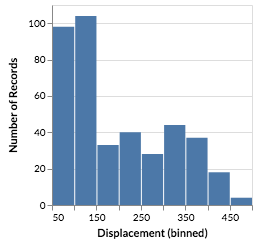

In [10]:
VegaLite(spec1, values)

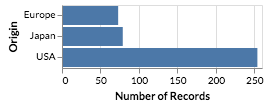

In [11]:
VegaLite(spec2, values)

In [12]:
def print_violations(spec):
    task = Task(data, Query.from_vegalite(spec))
    violations = count_violations(task)
    print(compute_cost(violations))
    pprint(compute_violation_costs(violations))
    print()
    
print('First:')
print_violations(spec1)

print('Second:')
print_violations(spec2)

First:
10
{'aggregate': (1, 1),
 'aggregate_count': (1, 0),
 'bin': (1, 2),
 'c_d_no_overlap_bar': (1, 0),
 'continuous_y': (1, 0),
 'encoding': (2, 0),
 'encoding_field': (1, 6),
 'ordered_x': (1, 1),
 'type_q': (2, 0)}

Second:
11
{'aggregate': (1, 1),
 'aggregate_count': (1, 0),
 'c_d_no_overlap_bar': (1, 0),
 'continuous_x': (1, 0),
 'encoding': (2, 0),
 'encoding_field': (1, 6),
 'nominal_y': (1, 0),
 'type_n': (1, 4),
 'type_q': (1, 0)}

